In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [101]:
# Directory containing CSV files
directory = 'data/'

# List to store DataFrames
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame and append it to the list
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)


In [102]:
# Group the DataFrame by the 'beta' column
grouped_df = combined_df.groupby('beta')

# Create an empty dictionary to store the arrays
beta_arrays = {}

# Iterate over the groups
for beta, group in grouped_df:
    # Store the group as an array in the dictionary
    beta_arrays[beta] = group.to_numpy()


In [103]:
def plotter(depVar, col, sweepRange):
    """Function plot dependant variable against number of sweeps
    dependantVar: give string that dependant variable will be called
    col: column index of dependant variable starting from 0
    sweepRange: range over which sweeps are plotted
    """
    
    # plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    plt.rcParams['figure.figsize'] = [6.4, 4.8]  # [width, height] in inches
    
    hist_data = []
    
    for beta, array in beta_arrays.items(): 
        
        # find number of seeds iterated over
        max_seed = 0
        for i in range(len(array)):
            if array[i][5] > max_seed:
                max_seed = int(array[i][5]) 

        # I don't know why I have to put this in
        max_seed += 2

        # magnetisation array for task 1
        # columns are: sweeps, magnetisation, error
        independentVar = np.zeros(max_seed)
        dependantVar = np.zeros(max_seed)

        # independentVar = np.zeros(200)
        # dependantVar = np.zeros(200)

        # errors
        value_squares = np.zeros(max_seed)
        # value_squares = np.zeros(200)
        value_errors = []

        # iterates over every beta value
        
        for i in range(len(array)):
            
            print(int(array[i][0]))
            
            j = int(array[i][0])
            # appends sweeps
            independentVar[j] = array[i][0]
            # appends dependantVar
            dependantVar[j] += array[i][col] / 50
            # appends dependantVar squared for error stuff
            value_squares[j] += array[i][col]**2 / 50
            
            # get histogram
            if beta == 0.4 and independentVar[j] == 1:
                
                print(beta)
                
                print(f"magnetisation = {dependantVar[j]}")
                
                # print("this works")
                # should append every magnetisation where beta = 0.4 and sweeps = 10
                hist_data.append(dependantVar[j])
                
            

        prefactor = 1 / ( np.sqrt( max_seed) -1 ) 
        for k in range(len(value_squares)):
            value_errors.append( prefactor * np.sqrt(value_squares[k] - dependantVar[k]**2) )
                        
        # slice arrays for plotting
        independentVar = independentVar[:sweepRange+1]
        dependantVar = dependantVar[:sweepRange+1]
        value_errors = value_errors[:sweepRange+1]
        
        # convert to dimensionless temperature
        T_0 = 1/beta
        
    #     plt.errorbar(independentVar, dependantVar, yerr=value_errors, fmt='o', capsize=3, label=beta)
        
    #     # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #     plt.legend(loc='lower right')
    #     # Set tick parameters inwards
    #     plt.tick_params(axis='both', direction='in')
    #     plt.xlabel('Sweeps')
    #     plt.xlim(0, sweepRange)

    #     plt.ylabel(depVar)
    #     plt.title(f'{depVar} vs Sweeps')
   
    # plt.savefig(f"figures/task1_{depVar}.png")
    # plt.show()
    
    print(f"histogram data = {hist_data}")

    return hist_data

    

In [104]:
hist_data = plotter("Magnetisation", 2, 50)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50

/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_46478/597834561.py:66: RuntimeWarning: invalid value encountered in sqrt
  value_errors.append( prefactor * np.sqrt(value_squares[k] - dependantVar[k]**2) )



4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2


In [105]:
hist_data

[0.01865,
 0.037125,
 0.055525,
 0.0744,
 0.0929,
 0.11165,
 0.130275,
 0.148975,
 0.16765,
 0.18605,
 0.20477499999999998,
 0.2229,
 0.24162499999999998,
 0.26042499999999996,
 0.27885,
 0.297575,
 0.31632499999999997,
 0.33449999999999996,
 0.3529,
 0.371525,
 0.390125,
 0.408875,
 0.4275,
 0.44605,
 0.464625,
 0.483125,
 0.501625,
 0.52015,
 0.53895,
 0.557525,
 0.5762250000000001,
 0.5949750000000001,
 0.6128500000000001,
 0.6314250000000001,
 0.6498250000000001,
 0.6681250000000001,
 0.6864000000000001,
 0.7050500000000002,
 0.7236750000000002,
 0.7424000000000002,
 0.7612000000000002,
 0.7799250000000002,
 0.7987000000000002,
 0.8173000000000001,
 0.8358000000000001,
 0.8545250000000001,
 0.8734250000000001,
 0.8921000000000001,
 0.9109500000000001,
 0.9294500000000001]

In [106]:
# plotter("Energy", 3)

In [107]:
hist_data

[0.01865,
 0.037125,
 0.055525,
 0.0744,
 0.0929,
 0.11165,
 0.130275,
 0.148975,
 0.16765,
 0.18605,
 0.20477499999999998,
 0.2229,
 0.24162499999999998,
 0.26042499999999996,
 0.27885,
 0.297575,
 0.31632499999999997,
 0.33449999999999996,
 0.3529,
 0.371525,
 0.390125,
 0.408875,
 0.4275,
 0.44605,
 0.464625,
 0.483125,
 0.501625,
 0.52015,
 0.53895,
 0.557525,
 0.5762250000000001,
 0.5949750000000001,
 0.6128500000000001,
 0.6314250000000001,
 0.6498250000000001,
 0.6681250000000001,
 0.6864000000000001,
 0.7050500000000002,
 0.7236750000000002,
 0.7424000000000002,
 0.7612000000000002,
 0.7799250000000002,
 0.7987000000000002,
 0.8173000000000001,
 0.8358000000000001,
 0.8545250000000001,
 0.8734250000000001,
 0.8921000000000001,
 0.9109500000000001,
 0.9294500000000001]

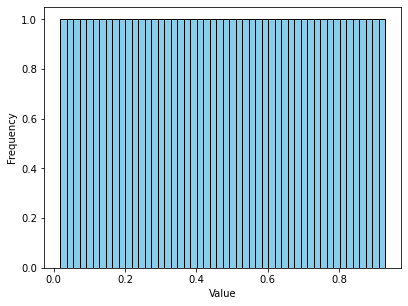

In [108]:
plt.hist(hist_data, bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
# plt.title('Histogram of Sample Data')

# Show plot
plt.show()